## Read .pkl file and compare the performance of different models using MAE and RMSE
### Printed out the r2_score, MAE, MSE and RMSE of different models, and plotted the MAE and RMSE bar chart

In [1]:
# Importing libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pandas.testing as tm
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from os import walk
import pickle
%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
mpl.rcParams['figure.figsize'] = 20,20
mpl.rcParams['font.size'] = 20
mpl.rcParams['lines.linewidth'] = 1.2

np.random.seed(42)
tf.random.set_seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
path1 = '/content/drive/My Drive/BD10/4features_pred_results.pkl'
path2 = '/content/drive/My Drive/BD10/9features_pred_results.pkl'
path3 = '/content/drive/My Drive/BD10/LSTM_FCN_4features_pred_results.pkl'
path4 = '/content/drive/My Drive/BD10/LSTM_FCN_9features_pred_results.pkl'
with open(path1,'rb') as f1:
        true_4f, pred_4f = pickle.load(f1)
with open(path2,'rb') as f2:
        true_9f, pred_9f = pickle.load(f2)
with open(path3,'rb') as f3:
        lstm_fcn_true_4f, lstm_fcn_pred_4f = pickle.load(f3)
with open(path4,'rb') as f4:
        lstm_fcn_true_9f, lstm_fcn_pred_9f = pickle.load(f4)

In [5]:
forecast_errors_4f=[]
for i in range(len(true_4f)):
    forecast_errors_4f.append(true_4f[i]-pred_4f[i])
    
forecast_errors_9f=[]
for i in range(len(true_9f)):
    forecast_errors_9f.append(true_9f[i]-pred_9f[i])

forecast_errors_lstm_fcn_4f=[]
for i in range(len(lstm_fcn_true_4f)):
    forecast_errors_lstm_fcn_4f.append(lstm_fcn_true_4f[i]-lstm_fcn_pred_4f[i])
    
forecast_errors_lstm_fcn_9f=[]
for i in range(len(lstm_fcn_true_9f)):
    forecast_errors_lstm_fcn_9f.append(lstm_fcn_true_9f[i]-lstm_fcn_pred_9f[i])


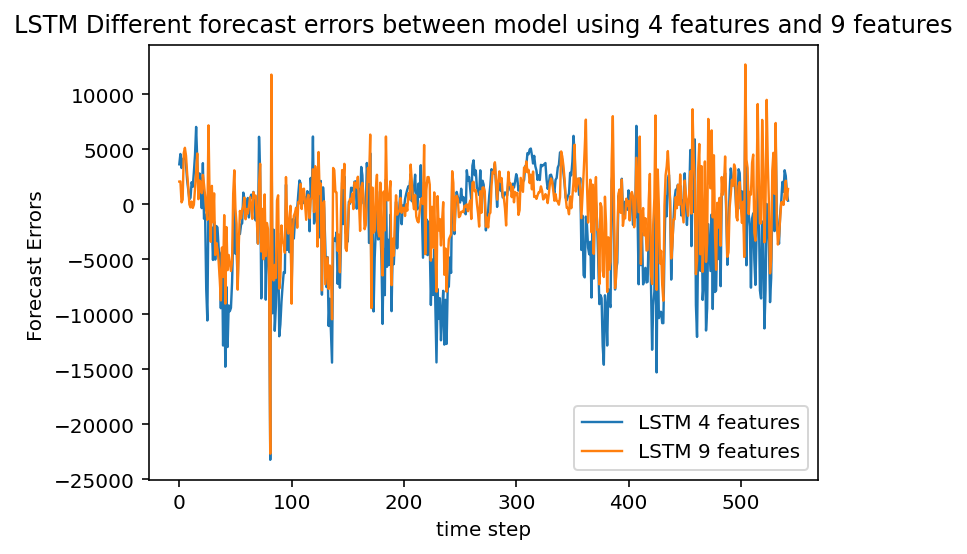

In [6]:
# For LSTM model performance (compare 4 features and 9 features)
plt.plot(forecast_errors_4f, label='LSTM 4 features')
plt.plot(forecast_errors_9f, label='LSTM 9 features')
plt.ylabel('Forecast Errors ')
plt.xlabel('time step')
plt.title('LSTM Different forecast errors between model using 4 features and 9 features')
plt.legend()

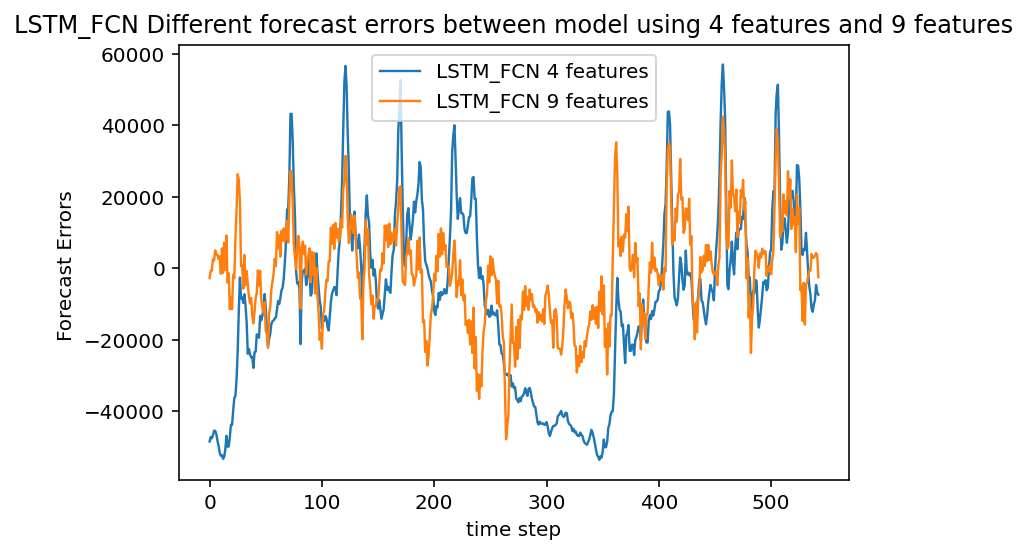

In [7]:
# For LSTM_FCN model performance (compare 4 features and 9 features)
plt.plot(forecast_errors_lstm_fcn_4f, label='LSTM_FCN 4 features')
plt.plot(forecast_errors_lstm_fcn_9f, label='LSTM_FCN 9 features')
plt.ylabel('Forecast Errors ')
plt.xlabel('time step')
plt.title('LSTM_FCN Different forecast errors between model using 4 features and 9 features')
plt.legend()

In [28]:
# Compare R2_Score, MAE, MSE, RMSE between 4 features and 9 features
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
# ########################################
# LSTM model
# ########################################
r2_Score_4f=r2_score(true_4f, pred_4f)
mae_4f=mean_absolute_error(true_4f, pred_4f)
mse_4f=mean_squared_error(true_4f, pred_4f)
rmse_4f=sqrt(mse_4f)
performance_4f=[r2_Score_4f,mae_4f,mse_4f,rmse_4f]

r2_Score_9f=r2_score(true_9f, pred_9f)
mae_9f=mean_absolute_error(true_9f, pred_9f)
mse_9f=mean_squared_error(true_9f, pred_9f)
rmse_9f=sqrt(mse_9f)
performance_9f=[r2_Score_9f,mae_9f,mse_9f,rmse_9f]

# ########################################
# LSTM_FCN model
# ########################################
lstm_fcn_r2_Score_9f=r2_score(lstm_fcn_true_9f, lstm_fcn_pred_9f)
lstm_fcn_mae_9f=mean_absolute_error(lstm_fcn_true_9f, lstm_fcn_pred_9f)
lstm_fcn_mse_9f=mean_squared_error(lstm_fcn_true_9f, lstm_fcn_pred_9f)
lstm_fcn_rmse_9f=sqrt(lstm_fcn_mse_9f)
lstm_fcn_performance_9f=[lstm_fcn_r2_Score_9f,lstm_fcn_mae_9f,lstm_fcn_mse_9f,lstm_fcn_rmse_9f]

lstm_fcn_r2_Score_4f=r2_score(lstm_fcn_true_4f, lstm_fcn_pred_4f)
lstm_fcn_mae_4f=mean_absolute_error(lstm_fcn_true_4f, lstm_fcn_pred_4f)
lstm_fcn_mse_4f=mean_squared_error(lstm_fcn_true_4f, lstm_fcn_pred_4f)
lstm_fcn_rmse_4f=sqrt(lstm_fcn_mse_4f)
lstm_fcn_performance_4f=[lstm_fcn_r2_Score_4f,lstm_fcn_mae_4f,lstm_fcn_mse_4f,lstm_fcn_rmse_4f]

# print R2_score, MAE, MSE, RMSE
print("LSTM Using 4 features: ",performance_4f)
print("LSTM Using 9 features: " ,performance_9f)
print("LSTM+FCN Using 4 features: ",lstm_fcn_performance_4f)
print("LSTM+FCN Using 9 features: " ,lstm_fcn_performance_9f)
name=['MAE','RMSE']

LSTM Using 4 features:  [0.9978935149689905, 3615.1726159645486, 24272096.753689732, 4926.67197545054]
LSTM Using 9 features:  [0.9989450342816366, 2518.2220591620626, 12155904.082389874, 3486.531812903745]
LSTM+FCN Using 4 features:  [0.9431417800498779, 20041.10546875, 655152158.9548424, 25595.940282686286]
LSTM+FCN Using 9 features:  [0.9826304551980531, 11049.574067679558, 200141594.0745417, 14147.140844514897]


In [9]:
# Add value for bar chart
def add_value(x,y):
  for a,b in zip(x,y):
    plt.text(a, b, '%.2f' % b, ha='center', va= 'bottom',fontsize=20) 

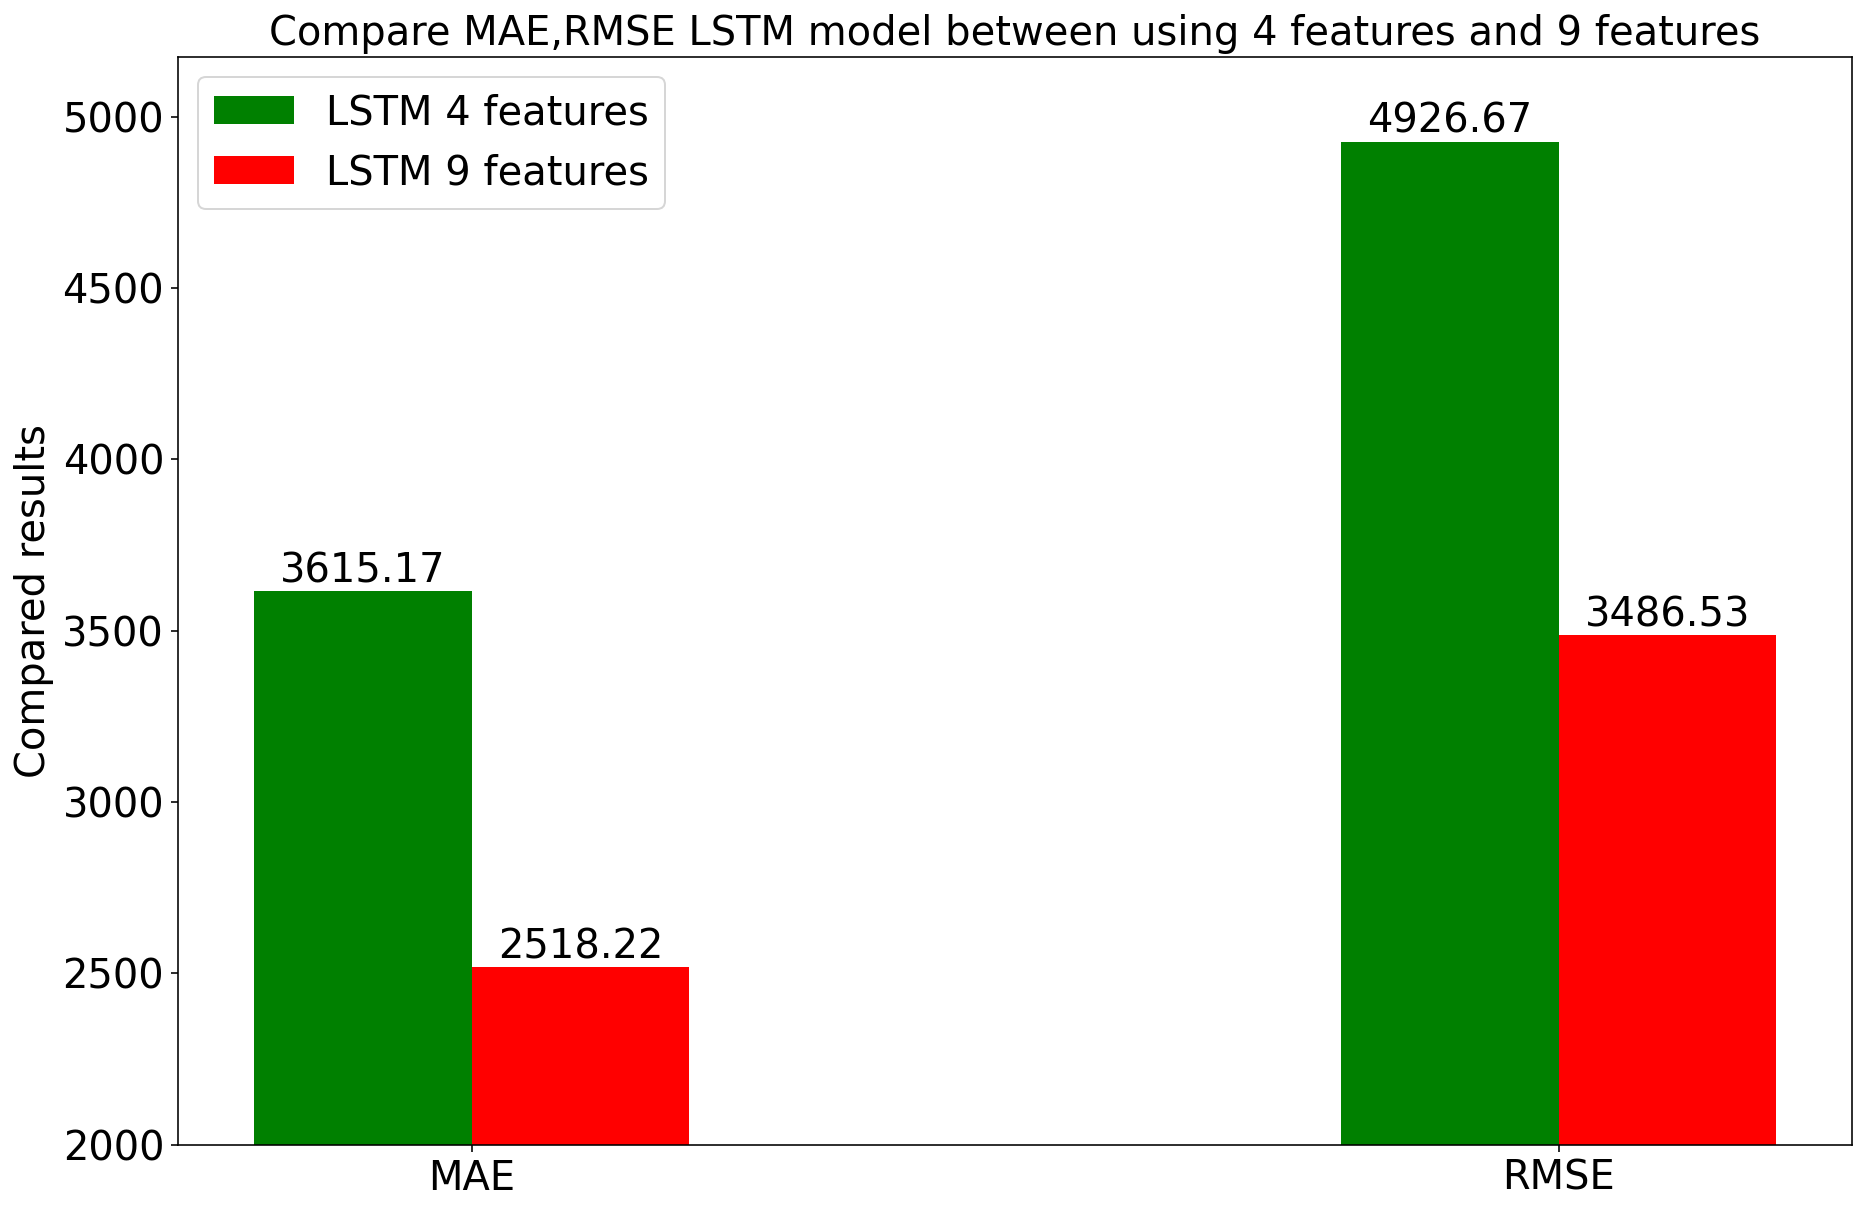

In [22]:
# Figure for LSTM model
mpl.rcParams['figure.figsize'] = 15,10
bar_width = 0.2 
index_4f = np.arange(len(name))  
index_9f = index_4f + bar_width  
plt.bar(index_4f, height=[performance_4f[1],performance_4f[3]], width=bar_width, color='g', label='LSTM 4 features')
plt.bar(index_9f, height=[performance_9f[1],performance_9f[3]], width=bar_width, color='r', label='LSTM 9 features')
plt.legend(fontsize=20)  
plt.ylim(2000)
plt.xticks(index_4f + bar_width/2, name,fontsize=20) 
plt.ylabel('Compared results',fontsize=20)  
plt.title('Compare MAE,RMSE LSTM model between using 4 features and 9 features',fontsize=20)  # title
add_value(index_4f,[performance_4f[1],performance_4f[3]])
add_value(index_9f,[performance_9f[1],performance_9f[3]])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

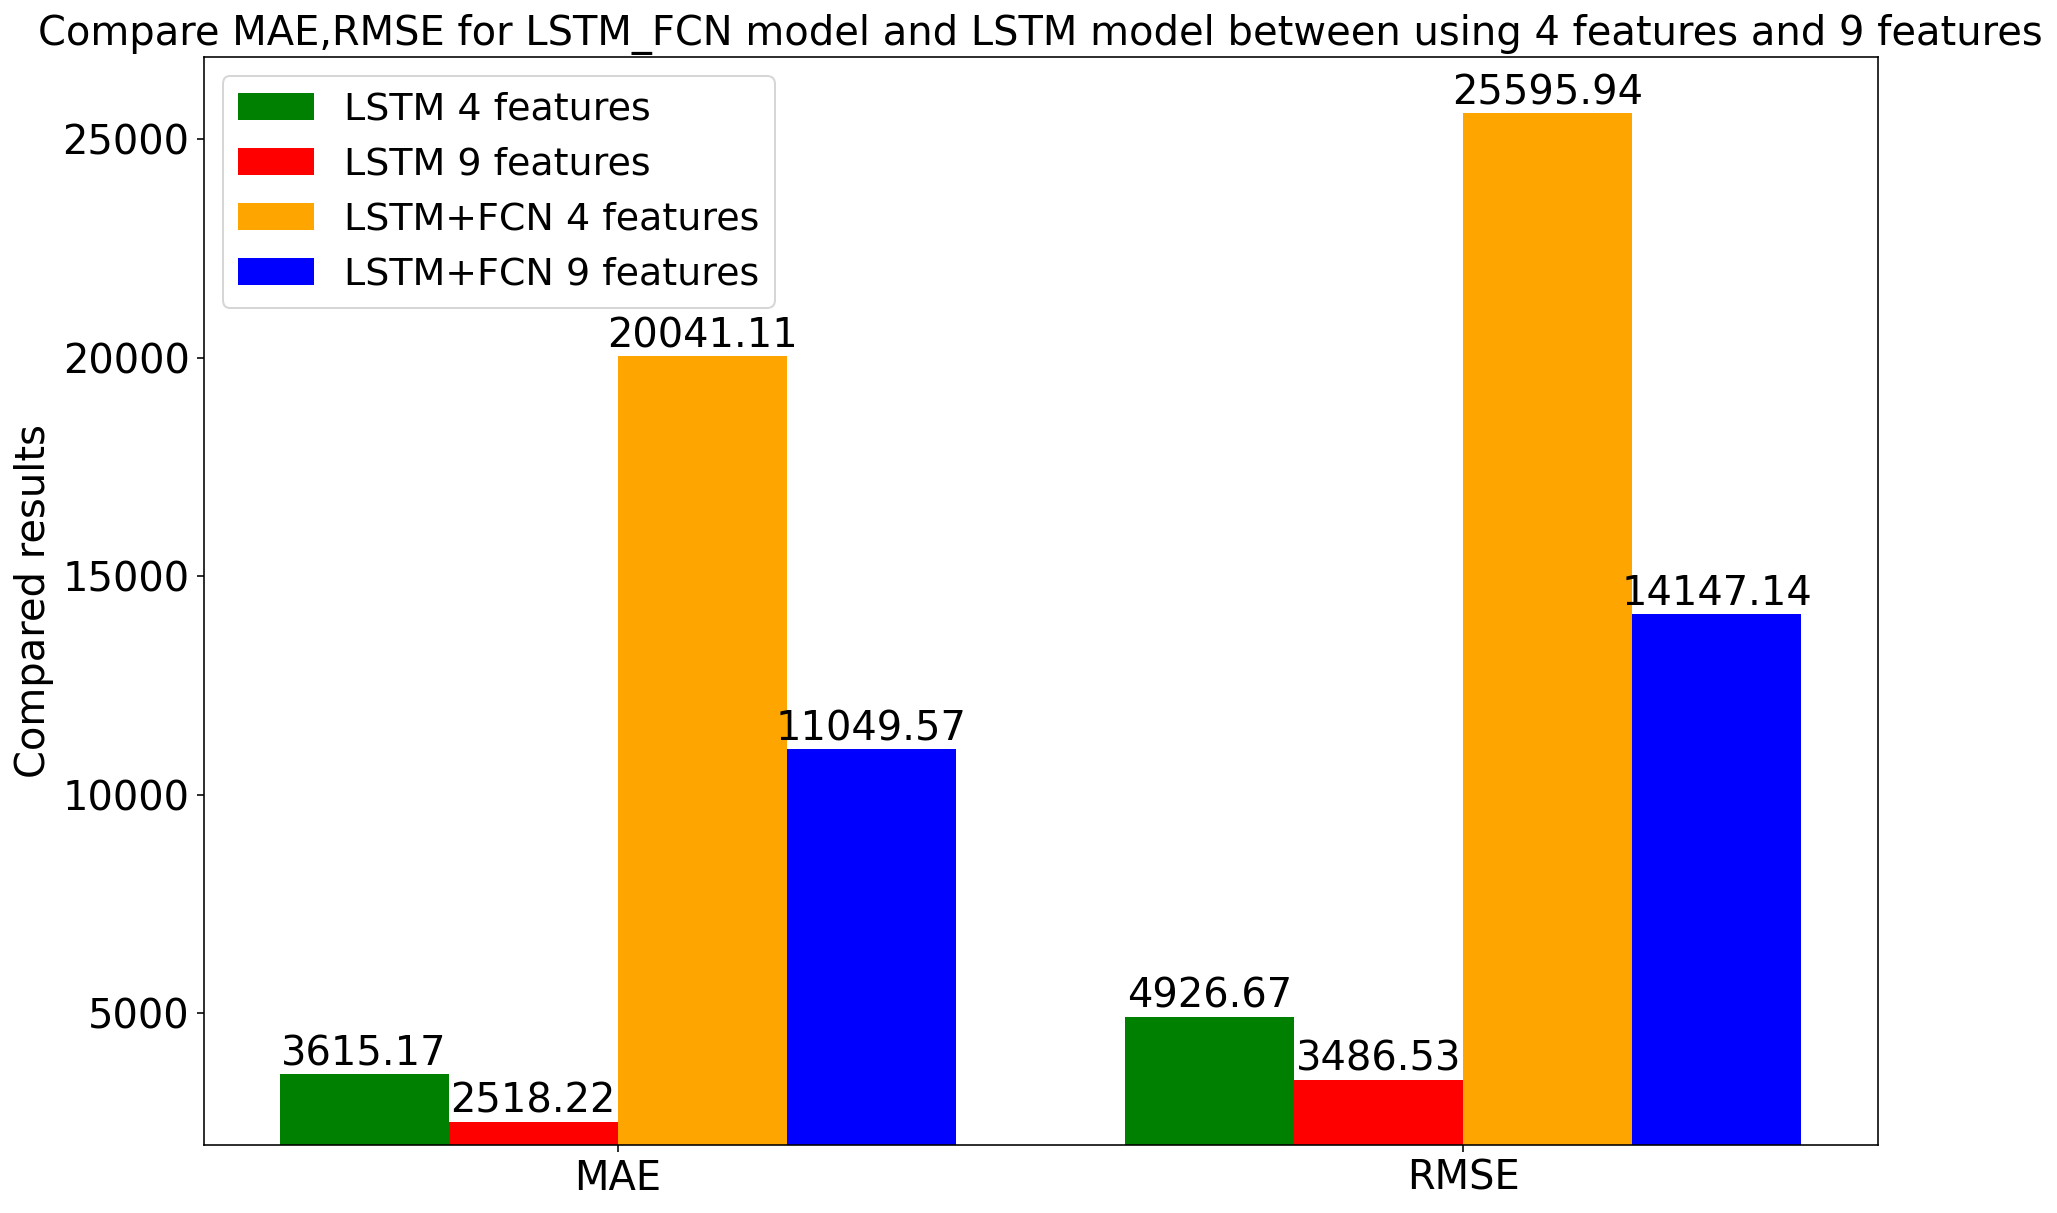

In [26]:
# Figure for LSTM_FCN model
mpl.rcParams['figure.figsize'] = 15,10
bar_width = 0.2 
index_4f = np.arange(len(name))  
index_9f = index_4f + bar_width  
lstm_index_4f = index_9f + bar_width 
lstm_index_9f = lstm_index_4f + bar_width 
plt.bar(index_4f, height=[performance_4f[1],performance_4f[3]], width=bar_width, color='g', label='LSTM 4 features')
plt.bar(index_9f, height=[performance_9f[1],performance_9f[3]], width=bar_width, color='r', label='LSTM 9 features')
plt.bar(lstm_index_4f, height=[lstm_fcn_performance_4f[1],lstm_fcn_performance_4f[3]], width=bar_width, color='orange', label='LSTM+FCN 4 features')
plt.bar(lstm_index_9f, height=[lstm_fcn_performance_9f[1],lstm_fcn_performance_9f[3]], width=bar_width, color='b', label='LSTM+FCN 9 features')
plt.ylim(2000)
add_value(index_4f,[performance_4f[1],performance_4f[3]])
add_value(index_9f,[performance_9f[1],performance_9f[3]])
add_value(lstm_index_4f,[lstm_fcn_performance_4f[1],lstm_fcn_performance_4f[3]])
add_value(lstm_index_9f,[lstm_fcn_performance_9f[1],lstm_fcn_performance_9f[3]])
plt.legend(fontsize=19)  
plt.xticks(index_4f +1.5* bar_width, name,fontsize=20) 
plt.yticks(fontsize=20)
plt.ylabel('Compared results',fontsize=20)  
plt.title('Compare MAE,RMSE for LSTM_FCN model and LSTM model between using 4 features and 9 features',fontsize=20)  # title
plt.show()